Title: Flip with 1 pixel shift

About the Technique:
The main reason to use this technique is because of Max Pooling layers. Pooling layers are good from the efficiency point of view, but they are reason why we lose information from the image. For most of the tasks in image processing, like detection of object like bottle, etc. the information we lost may not have that much effect on the model's generalizability. But when we are dealing with the tasks which involves understanding on the texture information, the model cannot keep track of the texture as we are loosing the information. So, to address this issue, we use flipping with 1 pixel shift technique. It is a simple technique where we will flip the image and shift the image horizontally and vertically by 1 pixel. So, in this way, we are managing both the texture information as well as efficiency as we clubbed flipping operation and shifting operation.

Importing required libraries

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pathlib as pl

In [2]:
def shift(img, x, y):
    translation_mat = np.float32([
        [1, 0, x],
        [0, 1, y]
    ])
    img_shift = cv.warpAffine(img, translation_mat, (img.shape[1], img.shape[0]))
    img_shift = img_shift.astype("uint8")
    return img_shift

In [3]:
#Using this function, we will perform Max Pooling operation on the given image
def max_pool_cal(img, x):
    reduced = np.zeros((x//2, x//2), dtype="uint8")
    row = 0
    col = 0
    for i in range(0, x, 2):
        for j in range(0, x, 2):
            max_val = 0
            for k in range(i, i+2):
                if i+2 <= x:
                    for l in range(j, j+2):
                        if j+2 <= x:
                            if img[k,l] > max_val:
                                max_val = img[k,l]
            if row < x//2:
                if col < x//2:
                    reduced[row, col] = max_val
                    col += 1
                if (col >= x//2  and j == x-2) or (col >= x//2  and j == x-1):
                    col = 0
                    row += 1
                
    return reduced

In [4]:
# Loading a image
img = cv.imread(r"D:\Samsung Prism\Datasets\Cat and Dog\Not 1 pixel Flipped\Cat\aug1001340d.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (300, 300))

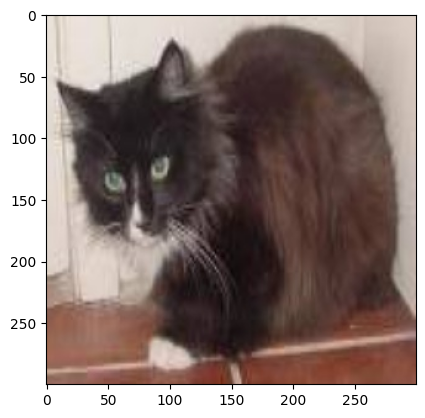

In [5]:
plt.imshow(img)

In [6]:
#Performing Max Pooling on the given image at various level
# (300, 300) -> (9, 9)
first = []
first.append(max_pool_cal(img[:, :, 0], 300))
first.append(max_pool_cal(first[-1], 150))
first.append(max_pool_cal(first[-1], 75))
first.append(max_pool_cal(first[-1], 37))
first.append(max_pool_cal(first[-1], 18))

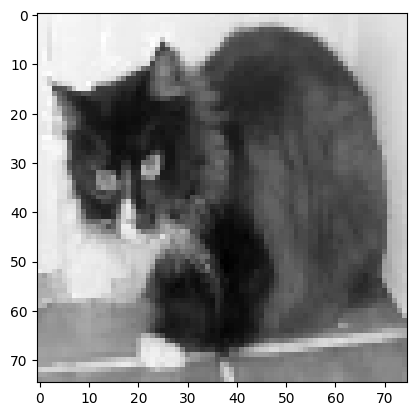

In [7]:
plt.imshow(first[1], cmap="gray")

In [8]:
#Shifting the image by one pixel
one_pixel_shift = shift(img, 1, 1)

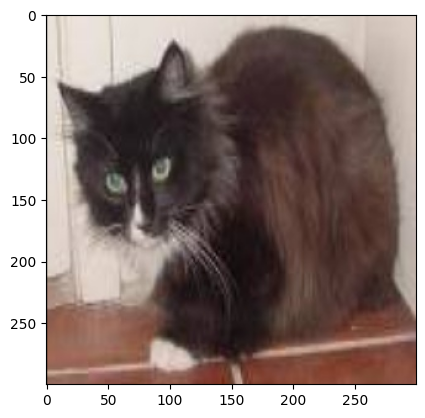

In [9]:
#Displaying the shifted image. For us, the image will be same as not shifted one.
plt.imshow(one_pixel_shift)

In [10]:
#Performing Max Pooling on the shifted image at various level
# (300, 300) -> (9, 9)
second = []
second.append(max_pool_cal(one_pixel_shift[:, :, 0], 300))
second.append(max_pool_cal(second[-1], 150))
second.append(max_pool_cal(second[-1], 75))
second.append(max_pool_cal(second[-1], 37))
second.append(max_pool_cal(second[-1], 18))

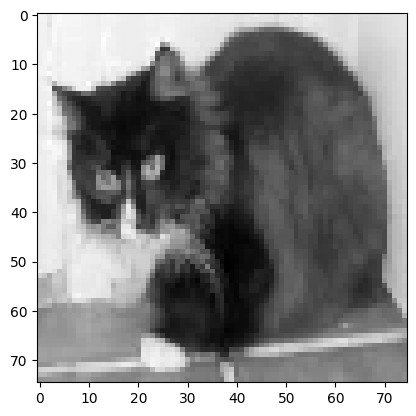

In [11]:
plt.imshow(second[1], cmap="gray")

In [12]:
#Finding the deviations in pixel to pixel comparision between shifted and non-shifted one at each level of max pooling
levels = []
for k in range(5):
    deviations = np.abs(first[k]-second[k])
    all_dev = []
    for i in deviations:
        for j in i:
            all_dev.append(j)
    all_dev = np.array(all_dev)
    levels.append(all_dev)

In [13]:
# Displaying the deviation of each layer of pooling
deviation_percentage = []
for i in range(len(levels)):
    print()
    all_dev = levels[i]
    print("Pooling " + str(i))
    print(f"Number of pixels with no deviation in value: {len(all_dev[all_dev==0])}")
    print(f"Total number of pixels: {len(all_dev)}")
    temp_per = round(((len(all_dev)) - len(all_dev[all_dev==0]))/(len(all_dev))*100, 2)
    print(f"Ratio of the pixels which are deviating in some value: {temp_per} %")
    deviation_percentage.append(temp_per)


Pooling 0
Number of pixels with no deviation in value: 4271
Total number of pixels: 22500
Ratio of the pixels which are deviating in some value: 81.02 %

Pooling 1
Number of pixels with no deviation in value: 1427
Total number of pixels: 5625
Ratio of the pixels which are deviating in some value: 74.63 %

Pooling 2
Number of pixels with no deviation in value: 463
Total number of pixels: 1369
Ratio of the pixels which are deviating in some value: 66.18 %

Pooling 3
Number of pixels with no deviation in value: 151
Total number of pixels: 324
Ratio of the pixels which are deviating in some value: 53.4 %

Pooling 4
Number of pixels with no deviation in value: 44
Total number of pixels: 81
Ratio of the pixels which are deviating in some value: 45.68 %


Text(0, 0.5, 'Deviation')

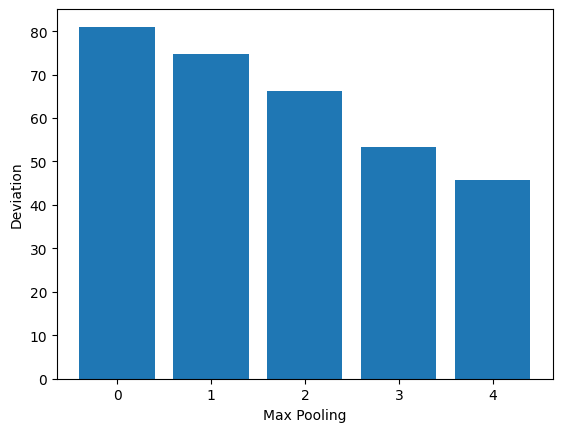

In [14]:
# Deviation in terms of percentage from each level of pooling
x = range(0, 5)
plt.bar(x, deviation_percentage)
plt.xlabel("Max Pooling")
plt.ylabel("Deviation")

Text(0, 0.5, 'No. of pixels')

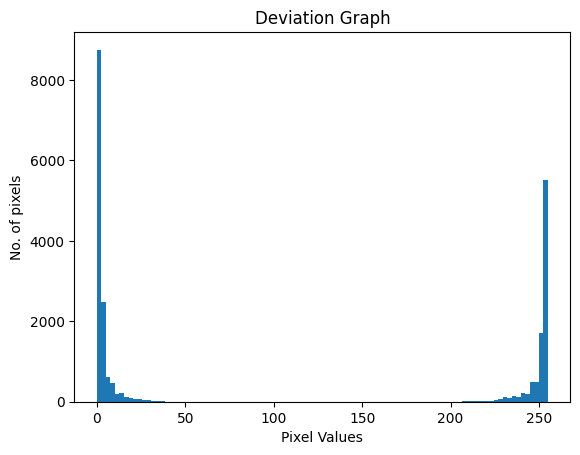

In [15]:
plt.title("Deviation Graph")
plt.hist(levels[0], bins=100)
plt.xlabel("Pixel Values")
plt.ylabel("No. of pixels")

In [20]:
# For batch execution, pass the path of input file and output file

input_file_path = r"D:\Samsung Prism\Datasets\Hidden"
output_file_path = r"D:\Samsung Prism\Datasets\Temp"

pathlib_file = pl.Path(input_file_path)
all_img_path = list(pathlib_file.glob("*"))

counter = 0
for i in all_img_path:
    img = cv.imread(str(i))
    img = cv.resize(img, (300, 300))
    img = cv.flip(img , 1)
    img = shift(img, 1, 1)
    cv.imwrite(output_file_path + "\\" + "aug_1fs_" + str(counter) + ".jpg", img)
    counter += 1